<h1 align="center">
CMSC 320 Final Project
</h1>

In [1]:
from toggle_codeblocks import code_button,center_output
code_button()

<h2 align="center">
Introduction

</h2>

Welcome to our Data Science Tutorial! This tutorial walks you through the Data Science pipeline of data curation, parsing and management, expoloratory data analysis, hypothesis testing, and machine learning. The data that we used in this tutorial is Freddie Mac's Single Family Loan-Level data set. We chose this data set because it gives us a large number of records while also giving us the opportunity to walk through the entire pipeline. I hope you enjoy the tutoral!

<h2 align="center">
Libraries Used

</h2>

In [2]:
import pandas as pd
from clean_data import *
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import re
plt.style.use('seaborn')

<h2 align="center">
Load data ⌛
</h2>
<hr> 
<p align="center">
<img src="https://media.giphy.com/media/8dYmJ6Buo3lYY/giphy.gif" width="70" height="70" />
</p>


<p align="center">
All actionable tasks require data so let us start by getting the data. We will be using pandas to read in the CSV(comma-separated values) file.
</p>

<p align="center">
We will tell pandas the path to the data, the loan sequence number(unique id), and that we want pandas to parse the data for us. 
</p>

<hr> 

<ol >
  <li>Path: 'data/loan_level_500k.csv'</li>
  <li>Index of the unique id: 19 </li>
  <li>Pandas should load the data with parsing: False </li>
</ol>  


In [3]:
df = pd.read_csv("data/loan_level_500k.csv",
                  index_col=19,
                  low_memory=False)
df.head()

CREDIT_SCORE  FIRST_PAYMENT_DATE  \
LOAN_SEQUENCE_NUMBER                                     
F199Q1000004                 669.0              200206   
F199Q1000005                 732.0              199904   
F199Q1000007                 679.0              200208   
F199Q1000013                 721.0              200209   
F199Q1000015                 618.0              200210   

                     FIRST_TIME_HOMEBUYER_FLAG  MATURITY_DATE  \
LOAN_SEQUENCE_NUMBER                                            
F199Q1000004                                 N         202901   
F199Q1000005                                 N         202903   
F199Q1000007                                 N         202902   
F199Q1000013                                 N         202902   
F199Q1000015                                 N         202902   

                      METROPOLITAN_STATISTICAL_AREA  \
LOAN_SEQUENCE_NUMBER                                  
F199Q1000004                                    NaN   
F199Q1000005                                17140.0   
F199Q1000007                                15940.0   
F199Q1000013                                38060.0   
F199Q1000015                                10420.0   

                      MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000004                                    0.0              1.0   
F199Q1000005                                    0.0              1.0   
F199Q1000007                                   30.0              1.0   
F199Q1000013                                    0.0              1.0   
F199Q1000015                                   25.0              1.0   

                     OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
LOAN_SEQUENCE_NUMBER                                                     
F199Q1000004                        O                             80.0   
F199Q1000005                        O                             25.0   
F199Q1000007                        O                             91.0   
F199Q1000013                        O                             39.0   
F199Q1000015                        O                             85.0   

                      ORIGINAL_DEBT_TO_INCOME_RATIO  ...  PROPERTY_STATE  \
LOAN_SEQUENCE_NUMBER                                 ...                   
F199Q1000004                                   33.0  ...              WV   
F199Q1000005                                   10.0  ...              OH   
F199Q1000007                                   48.0  ...              OH   
F199Q1000013                                   13.0  ...              AZ   
F199Q1000015                                   24.0  ...              OH   

                      PROPERTY_TYPE  POSTAL_CODE LOAN_PURPOSE  \
LOAN_SEQUENCE_NUMBER                                            
F199Q1000004                     SF      26100.0            P   
F199Q1000005                     SF      45200.0            N   
F199Q1000007                     SF      44700.0            P   
F199Q1000013                     SF      85200.0            N   
F199Q1000015                     SF      44200.0            N   

                     ORIGINAL_LOAN_TERM NUMBER_OF_BORROWERS    SELLER_NAME  \
LOAN_SEQUENCE_NUMBER                                                         
F199Q1000004                        320                 2.0  Other sellers   
F199Q1000005                        360                 1.0  Other sellers   
F199Q1000007                        319                 1.0  Other sellers   
F199Q1000013                        318                 2.0  Other sellers   
F199Q1000015                        317                 2.0  Other sellers   

                        SERVICER_NAME  PREPAID DELINQUENT  
LOAN_SEQUENCE_NUMBER                                       
F199Q1000004          Other servicers     True      False  
F199Q1000005          Other servi

<p align="center">So pandas loaded all of the data into a nice spreadsheet format.👍

<p align="center">But some of the data(Dates) are joined together and the models may have a hard time separating them!

<p align="center">So let us break up the data to have a tidy the Dataframe.

<h2 align="center">
 Tidy Data 🧹
</h2>
<hr> 
<p align="center">
<img src="https://media.giphy.com/media/119LVmecQWrzlm/giphy.gif" width="70" height="70" />
</p>


<p align="center">So we need to break up the data. First should check what the data looks like.</p>

<p align="center">Create a method of tidying the data and then try it on an example.</p>

In [4]:
df[["MATURITY_DATE","FIRST_PAYMENT_DATE"]].head()

MATURITY_DATE  FIRST_PAYMENT_DATE
LOAN_SEQUENCE_NUMBER                                   
F199Q1000004                 202901              200206
F199Q1000005                 202903              199904
F199Q1000007                 202902              200208
F199Q1000013                 202902              200209
F199Q1000015                 202902              200210

The dates seem to grouped in two blocks of number `[YEAR][MN]`.
We can try many methods however since the data is numerical and we and to ideally maintain it. 
<p align="center">So let us try mod and integer division to separate them.

<p align="center">We can get the year by performing on the <em>DATE</em> integer divsion by <em>100</em>.

<p align="center">We can get the month by take on the <em>DATE</em> mod <em>100</em>.

In [5]:
df =  tidy_data(df)
df.head()

CREDIT_SCORE FIRST_TIME_HOMEBUYER_FLAG  \
LOAN_SEQUENCE_NUMBER                                           
F199Q1000004                 669.0                         N   
F199Q1000005                 732.0                         N   
F199Q1000007                 679.0                         N   
F199Q1000013                 721.0                         N   
F199Q1000015                 618.0                         N   

                      METROPOLITAN_STATISTICAL_AREA  \
LOAN_SEQUENCE_NUMBER                                  
F199Q1000004                                    NaN   
F199Q1000005                                17140.0   
F199Q1000007                                15940.0   
F199Q1000013                                38060.0   
F199Q1000015                                10420.0   

                      MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000004                                    0.0              1.0   
F199Q1000005                                    0.0              1.0   
F199Q1000007                                   30.0              1.0   
F199Q1000013                                    0.0              1.0   
F199Q1000015                                   25.0              1.0   

                     OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
LOAN_SEQUENCE_NUMBER                                                     
F199Q1000004                        O                             80.0   
F199Q1000005                        O                             25.0   
F199Q1000007                        O                             91.0   
F199Q1000013                        O                             39.0   
F199Q1000015                        O                             85.0   

                      ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_UPB  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000004                                   33.0        162000   
F199Q1000005                                   10.0         53000   
F199Q1000007                                   48.0        133000   
F199Q1000013                                   13.0        174000   
F199Q1000015                                   24.0        122000   

                      ORIGINAL_LOAN_TO_VALUE  ...  ORIGINAL_LOAN_TERM  \
LOAN_SEQUENCE_NUMBER                          ...                       
F199Q1000004                            80.0  ...                 320   
F199Q1000005                            25.0  ...                 360   
F199Q1000007                            91.0  ...                 319   
F199Q1000013                            39.0  ...                 318   
F199Q1000015                            85.0  ...                 317   

                     NUMBER_OF_BORROWERS    SELLER_NAME    SERVICER_NAME  \
LOAN_SEQUENCE_NUMBER                                                       
F199Q1000004                         2.0  Other sellers  Other servicers   
F199Q1000005                         1.0  Other sellers  Other servicers   
F199Q1000007                         1.0  Other sellers  Other servicers   
F199Q1000013                         2.0  Other sellers  Other servicers   
F199Q1000015                         2.0  Other sellers  Other servicers   

                     PREPAID DELINQUENT  MATURITY_YEAR MATURITY_MON  \
LOAN_SEQUENCE_NUMBER                                                  
F199Q1000004            True          0           2029            1   
F199Q1000005            True          0           2029            3   
F199Q1000007            True          0           2029            2   
F199Q1000013            True          0           2029            2   
F199Q1000015            True          0           2029            2   

                      FIRST_PAYMENT_YEAR  FIRST_PAYMENT_MON  
LOAN_SEQUENCE_NUMBER                                         
F199Q1000004

Add it seems to work. Sucess!🏆

<hr>
However, it seems that our data has missing values like `nan`s.

There are many ways to handle missing data however the easiest method is to drop all missing data entries.

The other extreme is to create a model to sample and fill in the data.


We will try something in the middle, we will fill in the data using mean, median and mode and create a new column that indicates if we modified

<br>

The steps can be described as:

- Check if a column has a missing data

    
    - If they have missing data get an estimate of the data(mean/median/mode etc...)

    - Create a column that indicates if an entry has a missing value for a given column.
    
    - Replace the missing value with the estimate and set the column entry to true.

    
    


<h2 align="center">
Missing data 😱
</h2>
<hr>

Okay lets check for:

1. How much data are we missing?
2. Which columns have missing values?
3. Is there a pattern to missing values?


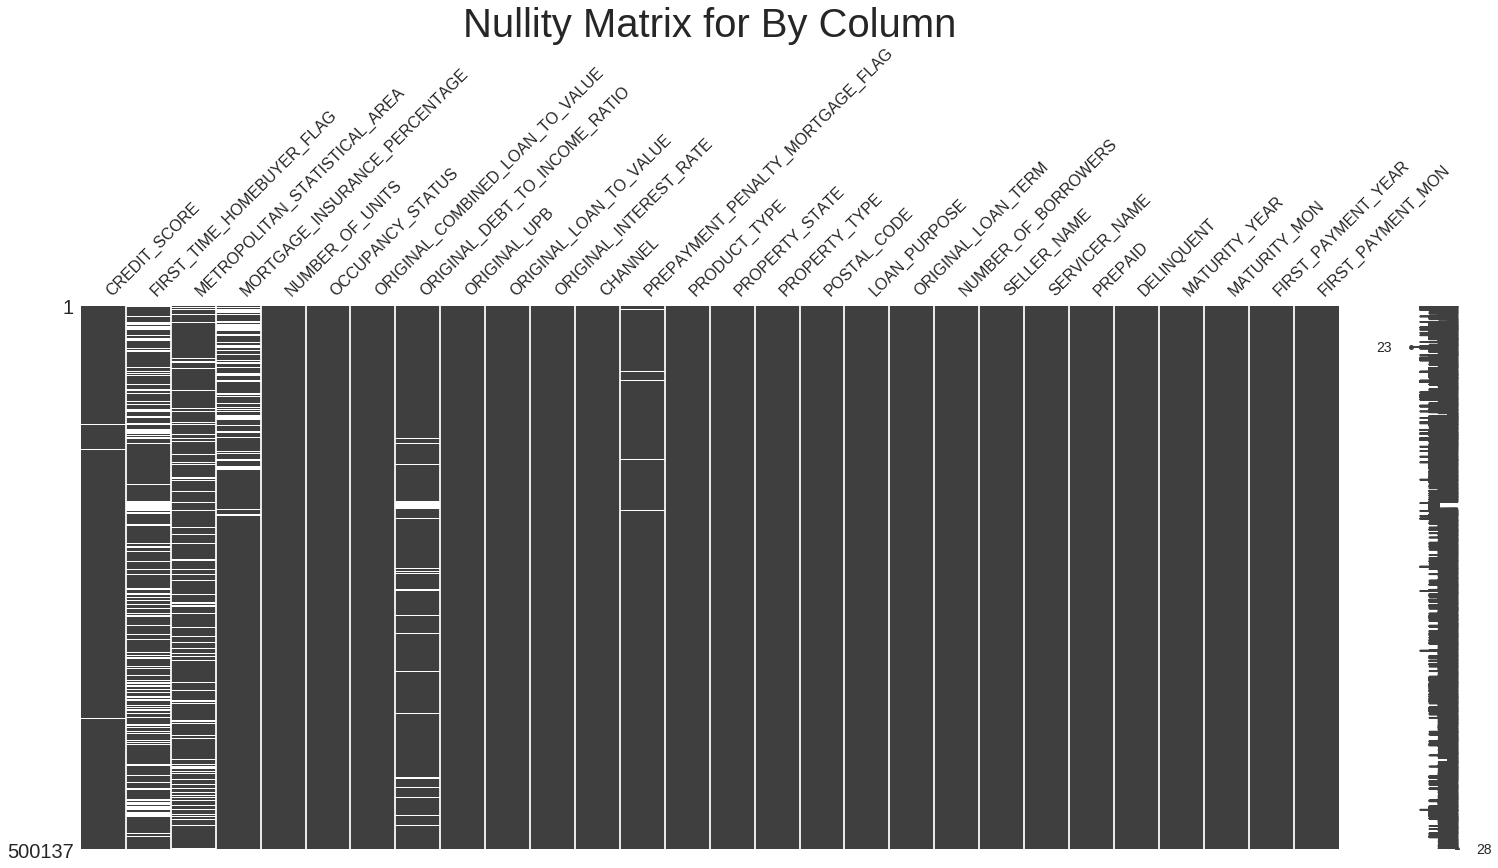

In [6]:
g = msno.matrix(df)
g.axes.set_title("Nullity Matrix for By Column",fontsize=40);

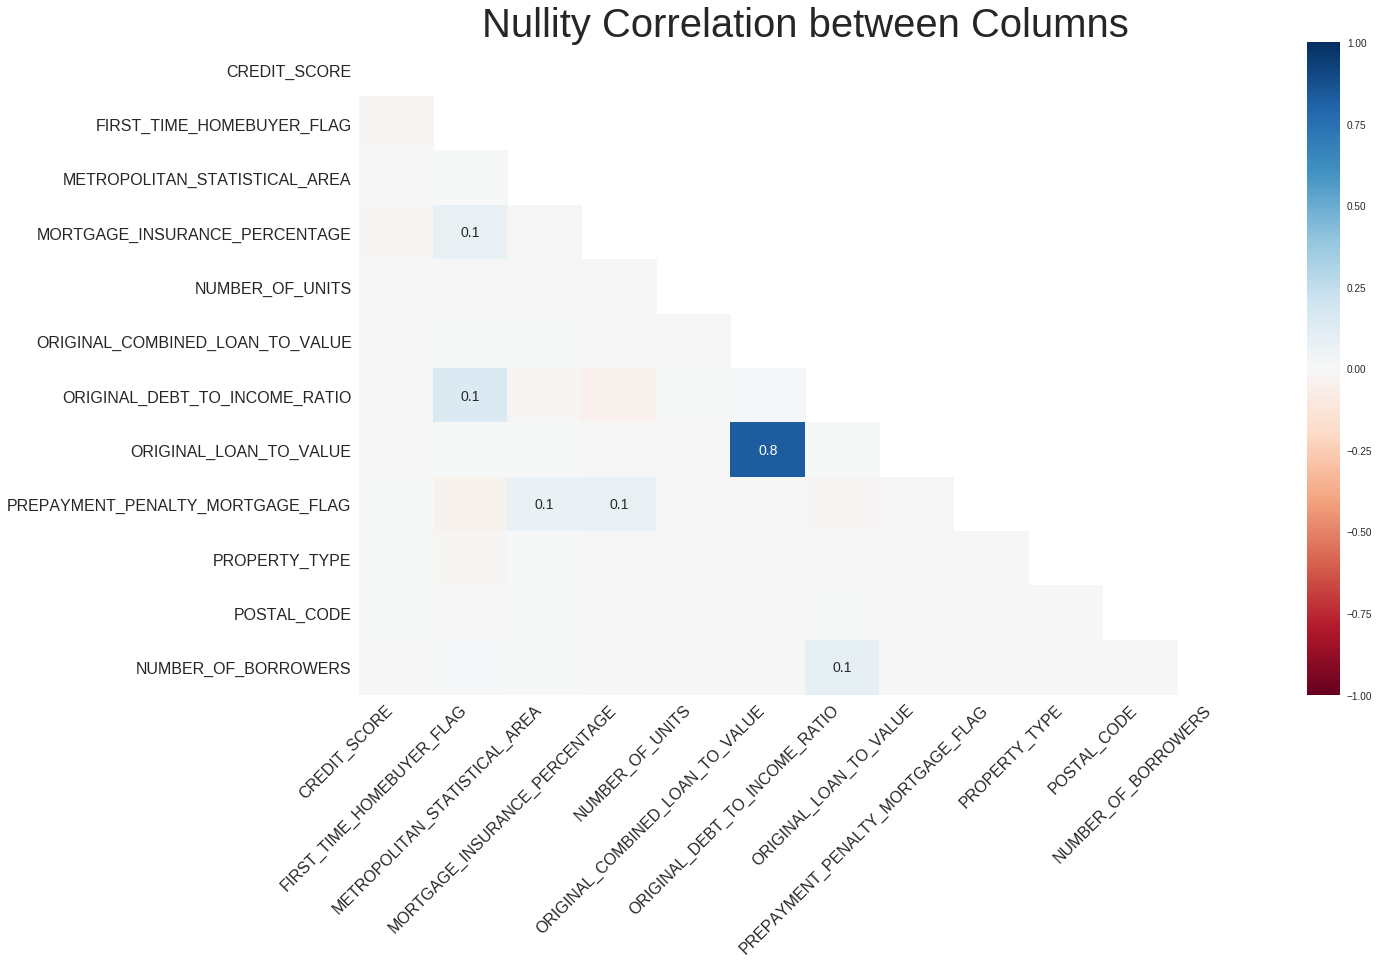

In [7]:

g = msno.heatmap(df)
g.axes.set_title("Nullity Correlation between Columns",fontsize=40);


The first figure show that:

- `CREDIT_SCORE`, `FIRST_TIME_HOMEBUYER_FLAG`, `METROPOLITAN_STATISTICAL_AREA`, `MORTGAGE_INSURANCE_PERCENTAGE`,  `ORIGINAL_DEBT_TO_INCOME_RATIO`, and `PREPAYMENT_PENTALTY_MORTGAGE_FLAG` have a lot of missing values. 

This answers our first question. ✔

<hr>

The second figure show that:

- There doesn't seem to be a strong correlation between columns for missing values, except for `ORIGINAL_COMBINED_LOAN_TO_VALUE` and `ORIGINAL_LOAN_TO_VALUE`.

This answers our third question. ✔

<hr>

To check for our second question, let's count the number of missing values in each column and make a table.

For clarity also remove all columns with no missing values




In [8]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

#Missing Values
CREDIT_SCORE                                 2711
FIRST_TIME_HOMEBUYER_FLAG                  130559
METROPOLITAN_STATISTICAL_AREA               70149
MORTGAGE_INSURANCE_PERCENTAGE               51048
NUMBER_OF_UNITS                                 3
ORIGINAL_COMBINED_LOAN_TO_VALUE                13
ORIGINAL_DEBT_TO_INCOME_RATIO               14929
ORIGINAL_LOAN_TO_VALUE                          9
PREPAYMENT_PENALTY_MORTGAGE_FLAG             5178
PROPERTY_TYPE                                  95
POSTAL_CODE                                    31
NUMBER_OF_BORROWERS                           247

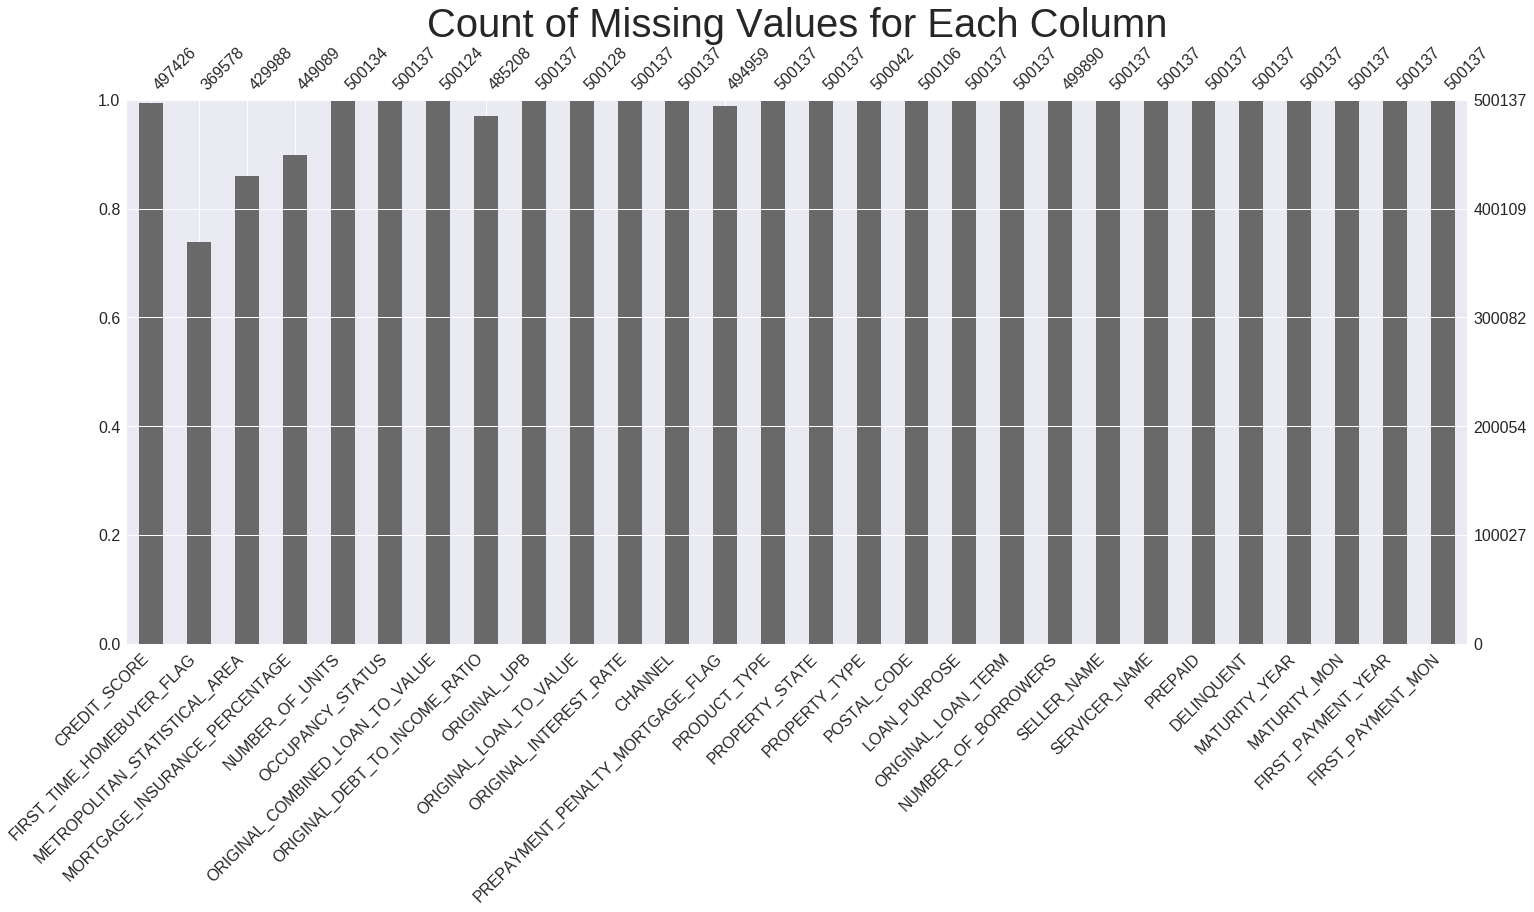

In [9]:
g = msno.bar(df);
g.set_title("Count of Missing Values for Each Column",fontsize=40);

This answers our second question. ✔

<h2 align="center">
 Fill missing data and convert categorical data to dummies 🧰
</h2>
<hr>

So now to get the data ready for ml lets to start by filling missing values first

Then convert the numerical data into number by performing one-hot encoding. 


In [10]:
train, test, encoder = get_train_test_split_for_ml(df,2000,True,True)

In [11]:
joined_filled_df = pd.concat((train,test))
missing_count_df = pd.DataFrame(joined_filled_df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

Empty DataFrame
Columns: [#Missing Values]
Index: []

Awesome we filled all of the data columns and we have no more missing values.

Note when filling columns make sure you get the values from train set only to reduce data leakage. 

Let check out our cleaned data:

In [12]:
train.head()

CREDIT_SCORE  METROPOLITAN_STATISTICAL_AREA  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000005                 732.0                        17140.0   
F199Q1000032                 765.0                        49700.0   
F199Q1000036                 787.0                        12060.0   
F199Q1000037                 730.0                        16620.0   
F199Q1000041                 706.0                        33340.0   

                      MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000005                                    0.0              1.0   
F199Q1000032                                    0.0              1.0   
F199Q1000036                                    0.0              1.0   
F199Q1000037                                   30.0              1.0   
F199Q1000041                                   30.0              1.0   

                      ORIGINAL_COMBINED_LOAN_TO_VALUE  \
LOAN_SEQUENCE_NUMBER                                    
F199Q1000005                                     25.0   
F199Q1000032                                     50.0   
F199Q1000036                                     80.0   
F199Q1000037                                     94.0   
F199Q1000041                                     93.0   

                      ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_UPB  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000005                                   10.0         53000   
F199Q1000032                                   26.0        112000   
F199Q1000036                                   18.0        124000   
F199Q1000037                                   29.0        138000   
F199Q1000041                                   28.0        103000   

                      ORIGINAL_LOAN_TO_VALUE  ORIGINAL_INTEREST_RATE  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000005                            25.0                   6.500   
F199Q1000032                            50.0                   6.625   
F199Q1000036                            80.0                   6.750   
F199Q1000037                            94.0                   7.000   
F199Q1000041                            93.0                   7.125   

                      POSTAL_CODE  ...  x9_GMACMTGECORP  \
LOAN_SEQUENCE_NUMBER               ...                    
F199Q1000005              45200.0  ...              0.0   
F199Q1000032              95900.0  ...              0.0   
F199Q1000036              30500.0  ...              0.0   
F199Q1000037              25300.0  ...              0.0   
F199Q1000041              53200.0  ...              0.0   

                      x9_HOMESIDELENDING,INC  x9_JPMORGANCHASEBANK,NA  \
LOAN_SEQUENCE_NUMBER                                                    
F199Q1000005                             0.0                      0.0   
F199Q1000032                             0.0                      0.0   
F199Q1000036                             0.0                      0.0   
F199Q1000037                             0.0                      0.0   
F199Q1000041                             0.0                      0.0   

                      x9_NATLCITYMTGECO  x9_Other servicers  \
LOAN_SEQUENCE_NUMBER                                          
F199Q1000005                        0.0                 1.0   
F199Q1000032                        0.0                 1.0   
F199Q1000036                        0.0                 0.0   
F199Q1000037                        0.0                 1.0   
F199Q1000041                        1.0                 0.0   

                      x9_PRINCIPALRESIDENTIAL  x9_SUNTRUSTMORTGAGE,INC  \
LOAN_SEQUENCE_NUMBER                                                     
F199Q1000005                              0.0                      0.0   
F199Q1000032                              0.0         

In [13]:
test.head()

CREDIT_SCORE  METROPOLITAN_STATISTICAL_AREA  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000004                 669.0                        16974.0   
F199Q1000007                 679.0                        15940.0   
F199Q1000013                 721.0                        38060.0   
F199Q1000015                 618.0                        10420.0   
F199Q1000016                 738.0                        10420.0   

                      MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000004                                    0.0              1.0   
F199Q1000007                                   30.0              1.0   
F199Q1000013                                    0.0              1.0   
F199Q1000015                                   25.0              1.0   
F199Q1000016                                    0.0              1.0   

                      ORIGINAL_COMBINED_LOAN_TO_VALUE  \
LOAN_SEQUENCE_NUMBER                                    
F199Q1000004                                     80.0   
F199Q1000007                                     91.0   
F199Q1000013                                     39.0   
F199Q1000015                                     85.0   
F199Q1000016                                     73.0   

                      ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_UPB  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000004                                   33.0        162000   
F199Q1000007                                   48.0        133000   
F199Q1000013                                   13.0        174000   
F199Q1000015                                   24.0        122000   
F199Q1000016                                   44.0        218000   

                      ORIGINAL_LOAN_TO_VALUE  ORIGINAL_INTEREST_RATE  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000004                            80.0                   7.120   
F199Q1000007                            91.0                   6.750   
F199Q1000013                            39.0                   6.625   
F199Q1000015                            85.0                   6.375   
F199Q1000016                            73.0                   6.000   

                      POSTAL_CODE  ...  x9_GMACMTGECORP  \
LOAN_SEQUENCE_NUMBER               ...                    
F199Q1000004              26100.0  ...              0.0   
F199Q1000007              44700.0  ...              0.0   
F199Q1000013              85200.0  ...              0.0   
F199Q1000015              44200.0  ...              0.0   
F199Q1000016              44300.0  ...              0.0   

                      x9_HOMESIDELENDING,INC  x9_JPMORGANCHASEBANK,NA  \
LOAN_SEQUENCE_NUMBER                                                    
F199Q1000004                             0.0                      0.0   
F199Q1000007                             0.0                      0.0   
F199Q1000013                             0.0                      0.0   
F199Q1000015                             0.0                      0.0   
F199Q1000016                             0.0                      0.0   

                      x9_NATLCITYMTGECO  x9_Other servicers  \
LOAN_SEQUENCE_NUMBER                                          
F199Q1000004                        0.0                 1.0   
F199Q1000007                        0.0                 1.0   
F199Q1000013                        0.0                 1.0   
F199Q1000015                        0.0                 1.0   
F199Q1000016                        0.0                 1.0   

                      x9_PRINCIPALRESIDENTIAL  x9_SUNTRUSTMORTGAGE,INC  \
LOAN_SEQUENCE_NUMBER                                                     
F199Q1000004                              0.0                      0.0   
F199Q1000007                              0.0         

<h2 align="center">
 EDA 🤠
</h2>
<p align="center">
<img src="https://media.giphy.com/media/l4KibOaou932EC7Dy/giphy.gif" width="40" height="40" />

</p>

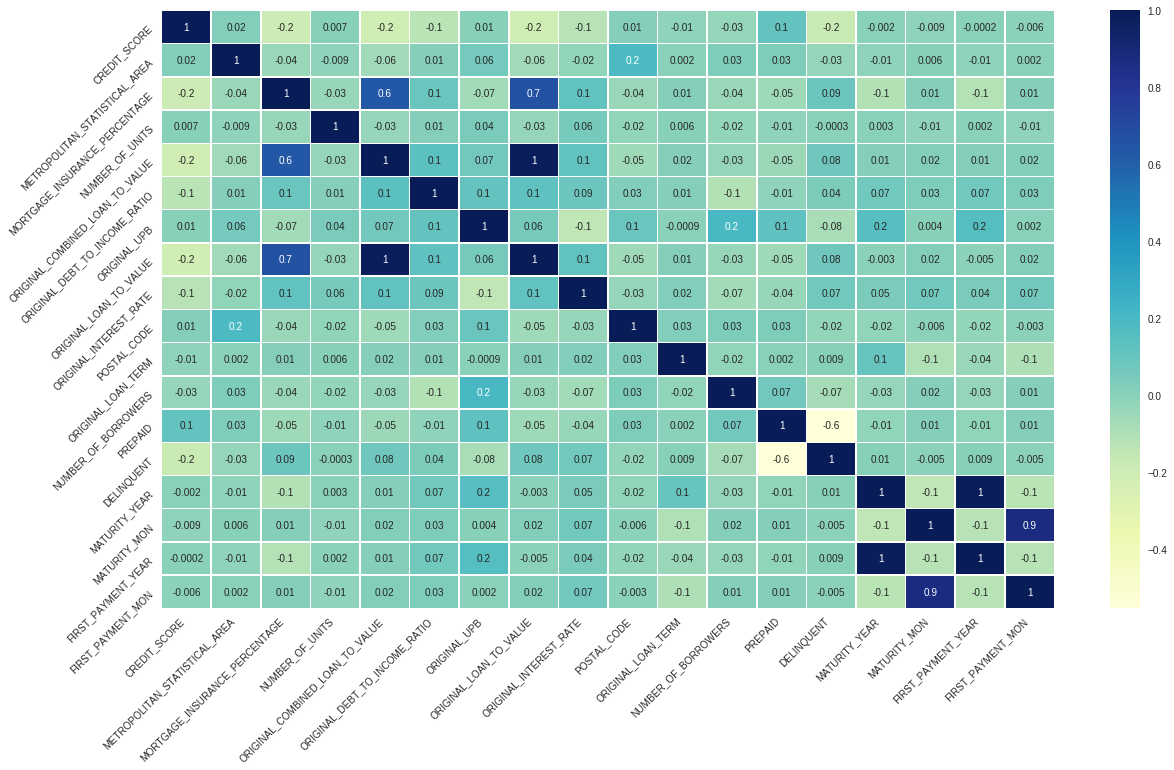

In [14]:
#Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right');

<h2 align="center">
 Hypothesis testing 🔬
</h2>
<p align="center">
<img src="https://media.giphy.com/media/7MZ0v9KynmiSA/source.gif" width="40" height="40" />
</p>

Now its time for the hypothesis testing! But first, let us understand what hypothesis testing is. Hypothesis testing is a statistical method of determining if your created model is a good fit or not. As the name indicates, in hypothesis testing you will have two hypotheses: a null hypothesis and an alternative hypothesis. You want to set up your hypothesis such that you reject the null hypothesis. What does it mean to reject the hypothesis though? This is where significance level comes into the picture. When setting up your experiment, in addition to the hypotheses, you set a significance level. If the p value of your random varaiable in within your siginficance level, also known as the rejection level, you reject the null hypothesis. While determining whether to reject your null hypothesis or not, be careful to determine what type of test you are setting up; is it one-tailed or two-tailed?

Let's look at an example now. In our example we will be looking to see if there is a linear correlation between credit score, originial combined loan to value, original UPB, originial loan to value, original interest rate, mortgage insurarnce percentage, number of borrowers, prepayment and delinquency. Since the variable that we are trying to predict is categorical (it can take two values 1 or True and 0 or False) we will be using a logistic regression instead of linear regression.

Before we run the test we must set up our hypotheses and the significance level:

$\alpha = 0.05$

$H_{o} = $ There is no linearity between the variables and delinquency

$H_{a} = $ There is linearity between the variables and delinquency

To be able to run a logistic regression, we need to encode our boolean predictor with 1's and 0's. For this example, we will encode True (i.e a loan is delinquent) as 1 and False (i.e a loan is not delinquent) as 0.

In [15]:
df['DELINQUENT_ENCODING'] = [1 if i else 0 for i in df['DELINQUENT']]
df.head()

CREDIT_SCORE FIRST_TIME_HOMEBUYER_FLAG  \
LOAN_SEQUENCE_NUMBER                                           
F199Q1000004                 669.0                         N   
F199Q1000005                 732.0                         N   
F199Q1000007                 679.0                         N   
F199Q1000013                 721.0                         N   
F199Q1000015                 618.0                         N   

                      METROPOLITAN_STATISTICAL_AREA  \
LOAN_SEQUENCE_NUMBER                                  
F199Q1000004                                    NaN   
F199Q1000005                                17140.0   
F199Q1000007                                15940.0   
F199Q1000013                                38060.0   
F199Q1000015                                10420.0   

                      MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS  \
LOAN_SEQUENCE_NUMBER                                                   
F199Q1000004                                    0.0              1.0   
F199Q1000005                                    0.0              1.0   
F199Q1000007                                   30.0              1.0   
F199Q1000013                                    0.0              1.0   
F199Q1000015                                   25.0              1.0   

                     OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
LOAN_SEQUENCE_NUMBER                                                     
F199Q1000004                        O                             80.0   
F199Q1000005                        O                             25.0   
F199Q1000007                        O                             91.0   
F199Q1000013                        O                             39.0   
F199Q1000015                        O                             85.0   

                      ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_UPB  \
LOAN_SEQUENCE_NUMBER                                                
F199Q1000004                                   33.0        162000   
F199Q1000005                                   10.0         53000   
F199Q1000007                                   48.0        133000   
F199Q1000013                                   13.0        174000   
F199Q1000015                                   24.0        122000   

                      ORIGINAL_LOAN_TO_VALUE  ...  NUMBER_OF_BORROWERS  \
LOAN_SEQUENCE_NUMBER                          ...                        
F199Q1000004                            80.0  ...                  2.0   
F199Q1000005                            25.0  ...                  1.0   
F199Q1000007                            91.0  ...                  1.0   
F199Q1000013                            39.0  ...                  2.0   
F199Q1000015                            85.0  ...                  2.0   

                        SELLER_NAME    SERVICER_NAME PREPAID DELINQUENT  \
LOAN_SEQUENCE_NUMBER                                                      
F199Q1000004          Other sellers  Other servicers    True          0   
F199Q1000005          Other sellers  Other servicers    True          0   
F199Q1000007          Other sellers  Other servicers    True          0   
F199Q1000013          Other sellers  Other servicers    True          0   
F199Q1000015          Other sellers  Other servicers    True          0   

                     MATURITY_YEAR  MATURITY_MON FIRST_PAYMENT_YEAR  \
LOAN_SEQUENCE_NUMBER                                                  
F199Q1000004                  2029             1               2002   
F199Q1000005                  2029             3               1999   
F199Q1000007                  2029             2               2002   
F199Q1000013                  2029             2               2002   
F199Q1000015                  2029             2               2002   

                      FIRST_PAYMENT_MON  DELINQUENT_ENCODING  
LOAN_SEQUENCE_NUMBER                                          
F199Q10000

Below is the code to run logistic regression. The variables I chose for the formula are based on the correlation heat map from earlier. I chose the variables that had a high (above 0.5) correlation with delinquency.

In [16]:
reg = logit('DELINQUENT_ENCODING ~ CREDIT_SCORE + ORIGINAL_COMBINED_LOAN_TO_VALUE + ORIGINAL_UPB + ORIGINAL_LOAN_TO_VALUE + ORIGINAL_INTEREST_RATE + MORTGAGE_INSURANCE_PERCENTAGE + NUMBER_OF_BORROWERS + PREPAID', df).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.095394
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     DELINQUENT_ENCODING   No. Observations:               446305
Model:                           Logit   Df Residuals:                   446296
Method:                            MLE   Df Model:                            8
Date:                 Fri, 15 May 2020   Pseudo R-squ.:                  0.4099
Time:                         17:50:29   Log-Likelihood:                -42575.
converged:                        True   LL-Null:                       -72150.
Covariance Type:             nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           5.2711      0.185     28.503      0.000       4.909       5.634
PREPAID[T.True]                    -4.1340      0.022   -191.844      0.000      -4.176      -4.092
CREDIT_SCORE                       -0.0116      0.000    -79.498      0.000      -0.012      -0.011
ORIGINAL_COMBINED_LOAN_TO_VALUE    -0.0284      0.006     -4.755      0.000      -0.040      -0.017
ORIGINAL_UPB                    -1.108e-06   1.88e-07     -5.896      0.000   -1.48e-06   -7.39e-07
ORIGINAL_LOAN_TO_VALUE              0.0496      0.006      8.054      0.000       0.038       0.062
ORIGINAL_INTEREST_RATE              0.2773      0.015     18.332      0.000       0.248       0.307
MORTGAGE_INSURANCE_PERCENTAGE       0.0055      0.001      4.761      0.000       0.003       0.008
NUMBER_OF_BORROWERS                -0.5496      0.020    -27.212      0.000      -0.589      -0.510
===================================================================================================
"""

After running the logistic regression, we can now see the coefficients for all the variables in our formula and their p values. According to the summary table, the p value for every variable is 0 which is within our rejection level. Therefore, we would reject the null hypothesis that there is no linear correlation between the variables and delinquency.

<h2 align="center">
 Machine learning 🤖
</h2>
<p align="center">
<img src="https://media.giphy.com/media/ckJF143W1gBS8Hk833/source.gif
" width="40" height="40" />
</p>

Now we are onto the machine learning component.

We decided to run a logistic regression instead of something like a linear regression because we were trying to predict the categorical variable of delinquency. Categorical variables are better predicted using a logistic regression over a linear regression. 

The following is the code used to run the logistic regression followed by some analysis of our model.

In [17]:
#Reading the data in
df = pd.read_csv("data/loan_level_500k.csv", low_memory=False, index_col=19)

In [18]:
#Tidying data with script
df = tidy_data(df)

In [19]:
#Sampling our data for our Logistic Regression due to computational constraints
df = df.sample(10000)

In [20]:
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import numpy as np

In [21]:
#Function from Project 4 with slight modification to return the actual model aswell
def get_roc_data(model, cv_obj):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X[train], y[train])
        scores = model.predict_proba(X[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y[test],scores)
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])
        
        aucs.append(sklearn.metrics.auc(fpr, tpr))
        
    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0
    
    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df, model

In [22]:
#Logistic Regression Prep
cv_obj = sklearn.model_selection.StratifiedKFold(n_splits=10)

lr = sklearn.linear_model.LogisticRegression(n_jobs = -1)
parameters = {}

lr_cv = sklearn.model_selection.GridSearchCV(lr, parameters, cv=10)

In [23]:
#Using Function from clean_data script to split into testing and training data
train,test, _ = get_train_test_split_for_ml(df, 2000,pre_process=True )

In [24]:
#Removing attributes
X = train.drop(["DELINQUENT","PREPAID"],axis=1).to_numpy()
y = train["DELINQUENT"]

In [25]:
#Using Function From Project 4 to train the logistic regression model
lr_curve_df, lr_auc_df, trained_model = get_roc_data(lr_cv, cv_obj)

lr_curve_df['model'] = 'logistic regression'
lr_auc_df['model'] = 'logistic regression'

A confusion matrix was produced after running our testing data against our logistic regression model to see what kind of results we would get. A confusion matrix is a 2x2 table that shows us the following values: True Positive, False Positive, True Negative and False Negative. These values are indicative of whether the model correctly or incorrectly predicted a delinquent or non-delinquent person. 

True Positive: Correctly predicted a Delinquent

False Positive: Incorrectly Predicted a Delinquent

True Negative: Correctly predicted a non-Delinquent

False Negative: Incorrectly Predicted a non-Delinquent

In [26]:
#Generating the Confusion Matrix using our test data
from sklearn.metrics import confusion_matrix

X = test.drop(["DELINQUENT","PREPAID"],axis=1).to_numpy()
y = test["DELINQUENT"]

scores = trained_model.predict_proba(X)[:,1]
scores = [1 if i > 0.5 else 0 for i in scores]

cm = confusion_matrix(y, scores)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[4607    8]
 [ 176    0]]


From these values we can evaluate the strength of our logistic regression model by calculating the Error Rate, Accuracy, Sensitivity and Specificity

In [27]:
#Printing out each value from the Confusion Matrix
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(4607, 8, 176, 0)

In [28]:
#Evaluation of Confusion Matrix
total = (tn + fp + fn + tp)

#Error Rate:
er = (fp + fn) / total

#Accuracy:
acc = (tp + tn) / total

#Sensitivity
sens = tp / (tp + fp)

#Specificity
spec = tn / (tn + fn)

(er, acc, sens, spec)

(0.03840534335211856, 0.9615946566478815, 0.0, 0.9632030106627639)

Error Rate: This model has a low error rate which is good. This means that it has a very small chance of predicting an incorrect outcome.

Accuracy: When a model has a low error rate, it typically has a high accuracy rate which means that it correctly predicts the outcome of our testing data most of the time. Our model is very accurate.

Specificity: This model is highly specific. This means that our model high a high amount of correct negative predictions.

Sensitivity: This model has a very poor sensitivity. This means that it has a very low amount of correct positive predictions. We think that we did not get any true positives from our model because of the overwhelming amounts on non-delinquent data we used to build the model. A way we could possibly improve this is by changing our sample to include more delinquent data.

Lets move onto a visual respresentation of our model. The following is our ROC data and our AUROC curve

In [29]:
#ROC data
lr_curve_df

fpr       tpr                model
0   0.000000  0.000000  logistic regression
1   0.010101  0.108421  logistic regression
2   0.020202  0.191053  logistic regression
3   0.030303  0.206579  logistic regression
4   0.040404  0.237895  logistic regression
..       ...       ...                  ...
95  0.959596  1.000000  logistic regression
96  0.969697  1.000000  logistic regression
97  0.979798  1.000000  logistic regression
98  0.989899  1.000000  logistic regression
99  1.000000  1.000000  logistic regression

[100 rows x 3 columns]

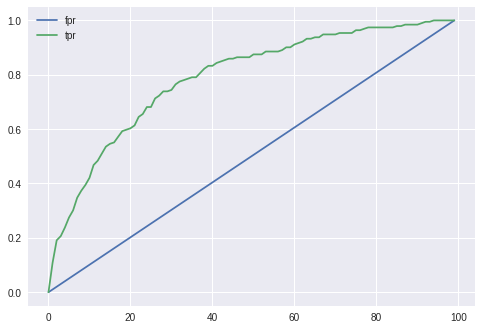

In [30]:
#Plot of ROC Curve
lr_curve_df.plot.line()

In our AUROC Curve, we see two lines. The line at 45 degrees symbolizes using a 50-50 approach of guessing whether someone was delinquent or not. The green line above this 45-degree line is our logistic regression model. The greater the y-value, the more accurate the model is at predicting whether someone is delinquent. A perfect model would have a consistent y-value of 1. We can deduce from this graph that our logistic regression model is quite a bit better at predicting whether someone is delinquent than just random guessing. 

In our hypothesis testing we said that we picked variables based on how correlated they were based on our correlation matrix. Since all those variables resulted in a p_value of less than 0.05, they were all deemed to be significant variables for our models. If one or more of those variables were over the significance value of 0.05 then we would have run another logistic regression excluding those variables and would compare the AUROC curves of both models. 

<h2 align="center">
 Conclusion 👋
</h2>
<p align="center">
<img src="https://media.giphy.com/media/jUwpNzg9IcyrK/source.gif" width="40" height="40" />
</p>